In [1]:
import numpy as np
import os
from data_utils import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define some paths
root = '../project1/'
data = os.path.join(root, 'Data/')
train_set_root = os.path.join(data, 'train.csv')
test_set_root = os.path.join(data, 'test.csv')

In [3]:
train_data, train_label = load_data(train_set_root)

(array([99913., 77544., 50379., 22164.]), array([0.  , 0.75, 1.5 , 2.25, 3.  ]), <BarContainer object of 4 artists>)


Text(0, 0.5, 'Count')

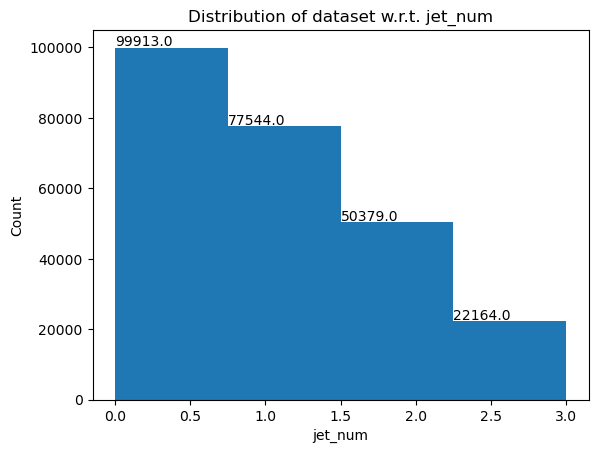

In [4]:
# visualize the data imbalance
arr = plt.hist(train_data[:, 22], bins=4)
print(arr)
for i in range(4):
    plt.text(arr[1][i],arr[0][i] + 500,str(arr[0][i]))
plt.title('Distribution of dataset w.r.t. jet_num')
plt.xlabel('jet_num')
plt.ylabel('Count')

In [5]:
x = train_data.copy()
x

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

In [6]:
feature_idx_dict = {0: [0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21],
                        1: [0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 29],
                        2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25,
                            26, 27, 28, 29]}
jetnum = 22

group0 = x[np.where(x[:, jetnum] == 0)]
group0_x = group0[:, feature_idx_dict[0]]
group0_labels = train_label[np.where(x[:, jetnum] == 0)]

group1 = x[np.where(x[:, jetnum] == 1)]
group1_x = group1[:, feature_idx_dict[1]]
group1_labels = train_label[np.where(x[:, jetnum] == 1)]

group2 = x[np.where(x[:, jetnum] >= 2)]
group2_x = group2[:, feature_idx_dict[2]]
group2_labels = train_label[np.where(x[:, jetnum] == 2)]

In [7]:
n_feature_0 = group0_x.shape
n_feature_0

(99913, 18)

In total 18 features, change to 6 x 3

In [8]:
group0_x = standardize(group0_x)

In [9]:
group0_labels

array([-1., -1., -1., ..., -1., -1., -1.])

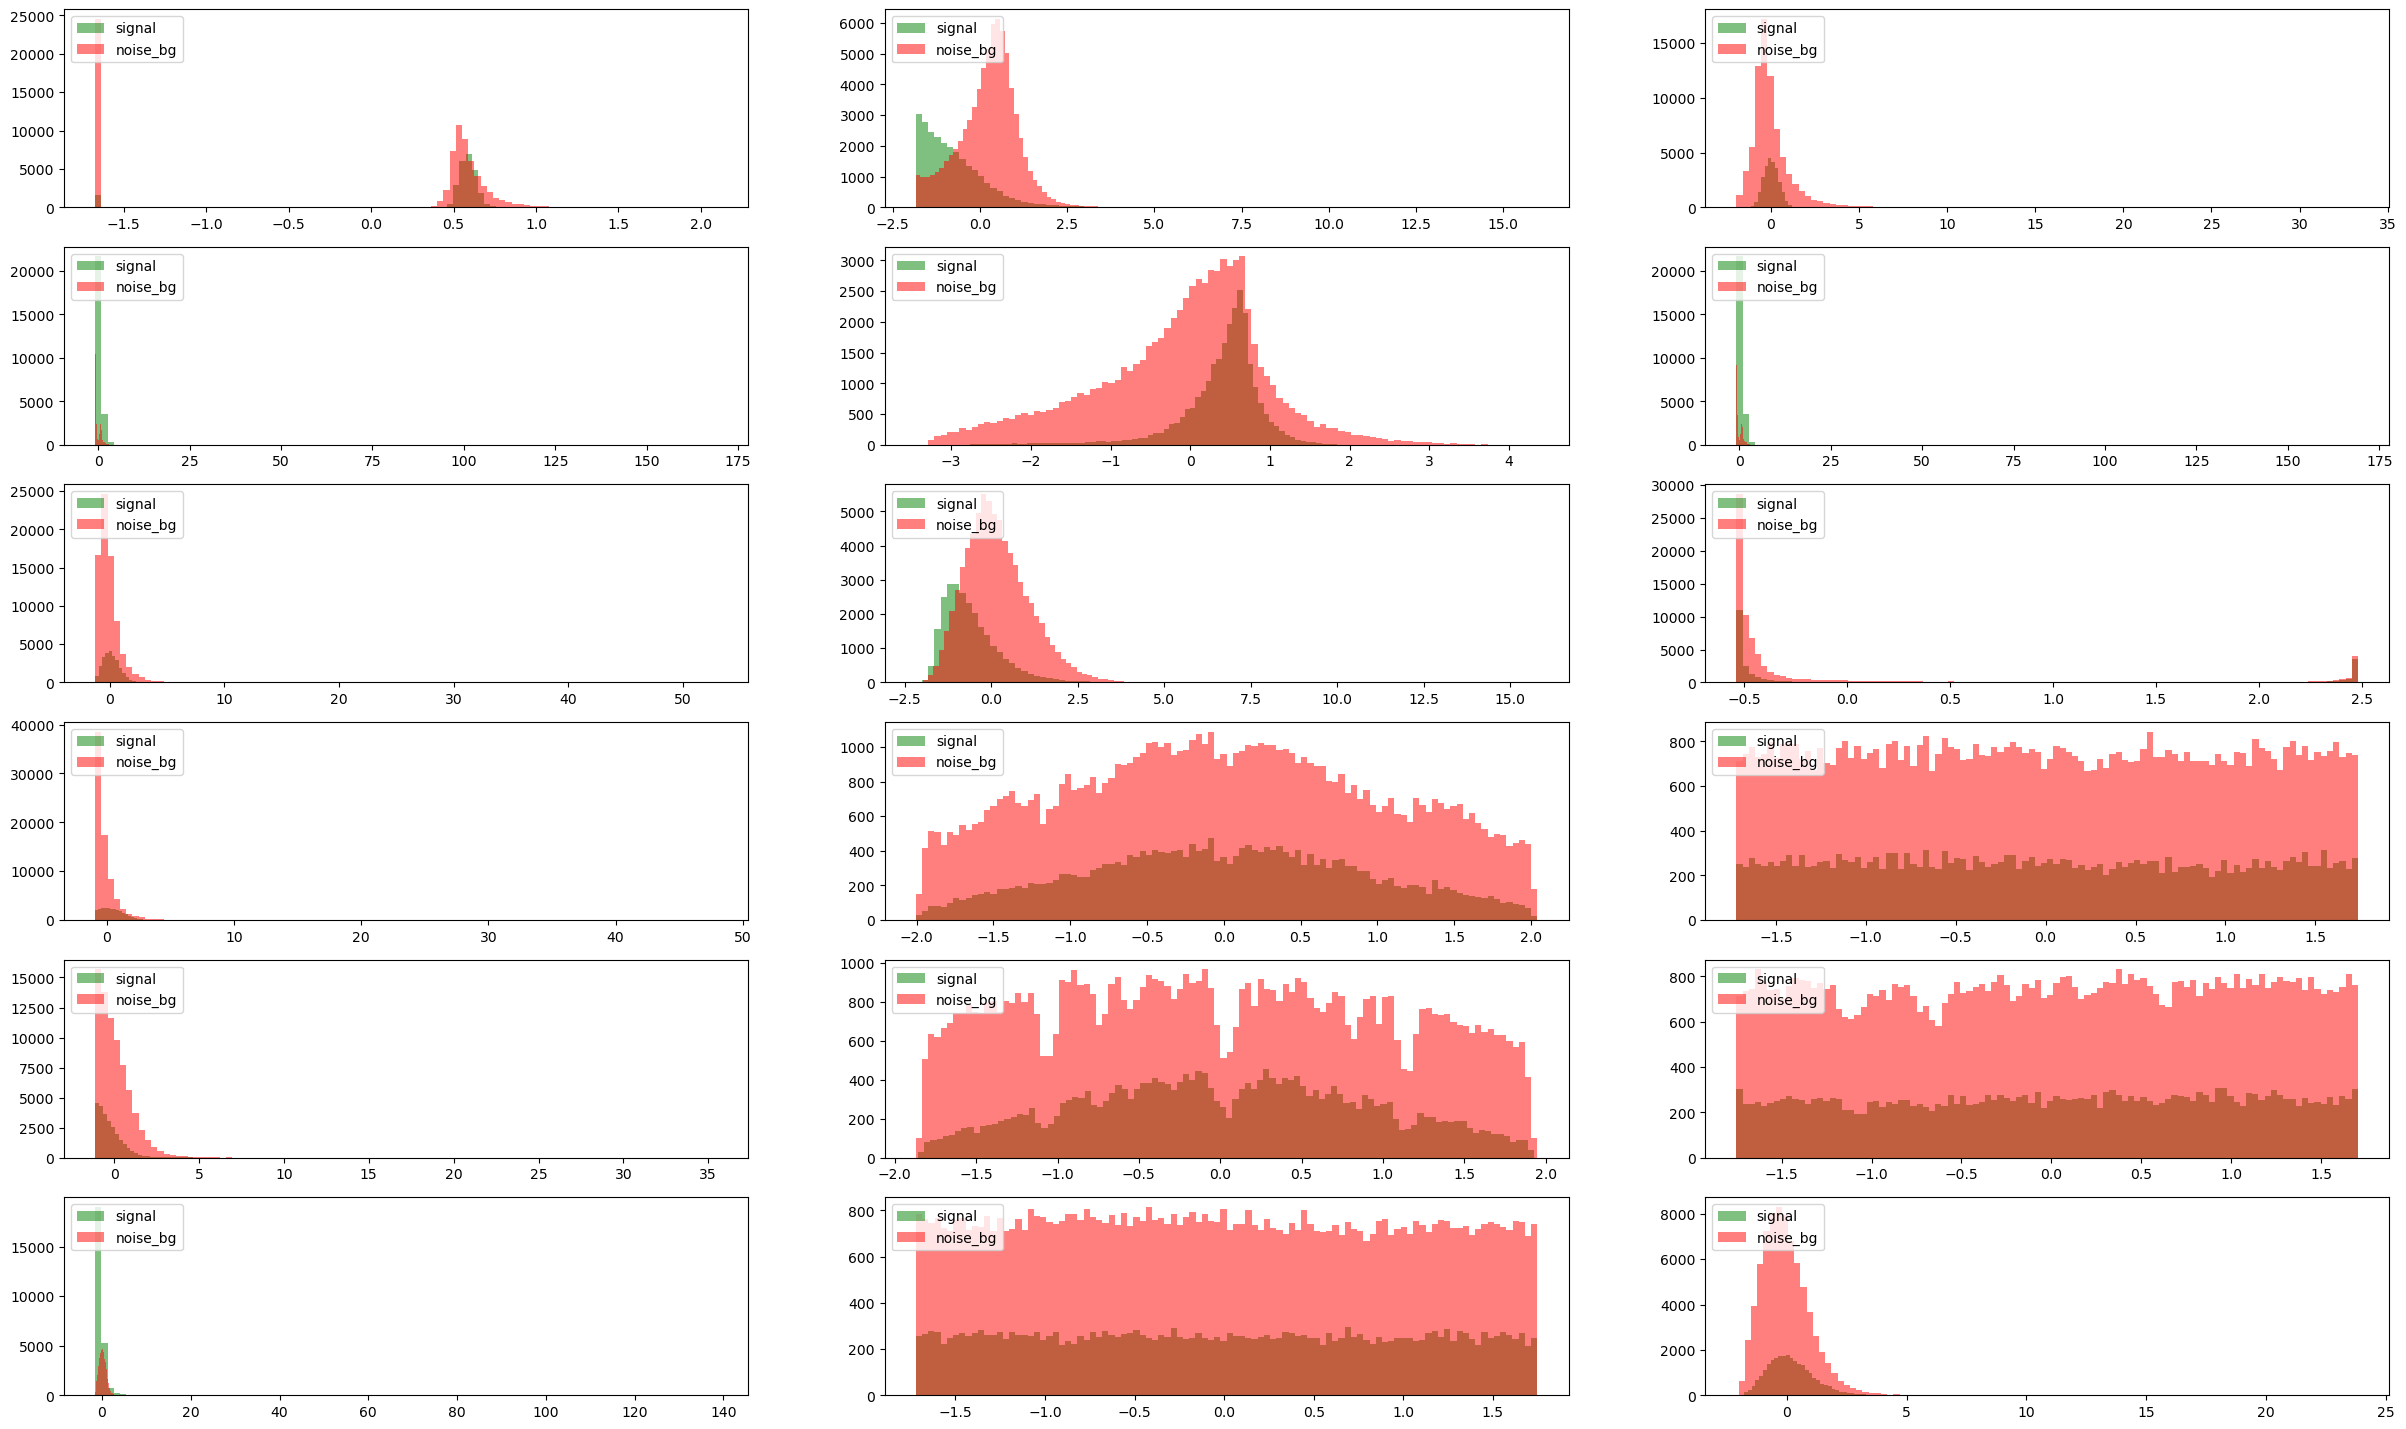

In [10]:
fig, axs = plt.subplots(6, 3, figsize=(30, 18))
axs = axs.ravel()
for id, ax in enumerate(axs):
    ax.hist(group0_x[np.where(group0_labels==1)[0], id], bins=100, alpha=0.5, label='signal', color='green')
    ax.hist(group0_x[np.where(group0_labels==-1)[0], id], bins=100, alpha=0.5, label='noise_bg', color='red')
    ax.legend(loc='upper left')

In [28]:
plt.savefig('features.png')

<Figure size 640x480 with 0 Axes>

To be written in the data cleaning:
Observing the graphs, it is shown that for each feature it is more concentrated on middle. Therefore we can do the data cleaning by using the n-sigma principle by assuming that they are in normal distribution.

In [11]:
import numpy as np
import data_utils
import implementations
%load_ext autoreload
%autoreload 2

In [12]:
def add_bias(x):
    N, D = x.shape
    bias_x = np.ones((N, D+1))
    bias_x[:, :D] = x
    return bias_x

In [15]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import sys
import sys

eps = sys.float_info.epsilon  # a small number for numerical stability


def load_data(path):
    label = np.genfromtxt(path, delimiter=",", skip_header=1, dtype=str, usecols=1)
    all_data = np.genfromtxt(path, delimiter=",", skip_header=1)

    data = all_data[:, 2:]

    labels = np.ones(len(label))
    labels[np.where(label == 'b')] = -1

    return data, labels


def group_data_jetnum(x, labels):
    feature_idx_dict = {0: [0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21],
                        1: [0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 29],
                        2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25,
                            26, 27, 28, 29]}

    jetnum = 22

    group0 = x[np.where(x[:, jetnum] == 0)]
    group0_x = group0[:, feature_idx_dict[0]]
    group0_labels = labels[np.where(x[:, jetnum] == 0)]

    group1 = x[np.where(x[:, jetnum] == 1)]
    # print(group1)
    group1_x = group1[:, feature_idx_dict[1]]
    group1_labels = labels[np.where(x[:, jetnum] == 1)]

    group2 = x[np.where(x[:, jetnum] >= 2)]
    group2_x = group2[:, feature_idx_dict[2]]
    group2_labels = labels[np.where(x[:, jetnum] >= 2)]

    return group0_x, group0_labels, group1_x, group1_labels, group2_x, group2_labels


def handle_outlier(x, n=3, how="sigma"):
    '''
    Input:
        x: input data

        n:
        n = 3 for n-sigma
        n usually <= 0.5 when using IQR

        how: "sigma" / "IQR"

    Output:
        sigma:
    '''
    D = x.shape[1]
    method = how
    if method == "sigma":
        for dim in range(D):
            cur_dim_x = x[:, dim]

            cur_mean = np.mean(cur_dim_x)
            cur_std = np.std(cur_dim_x)
            sigma_3 = cur_std * float(n)

            mean_3sigma_up = cur_mean + sigma_3
            mean_3sigma_below = cur_mean - sigma_3

            data_inside_3sigma = [v for v in cur_dim_x if (v >= mean_3sigma_below) and (v <= mean_3sigma_up)]

            no_outlier = len(data_inside_3sigma) == 0
            if not no_outlier:
                cur_dim_x[np.where(cur_dim_x > mean_3sigma_up)] = np.max(data_inside_3sigma)
                cur_dim_x[np.where(cur_dim_x < mean_3sigma_below)] = np.min(data_inside_3sigma)

            x[:, dim] = cur_dim_x
    elif method == "IQR":
        for dim in range(D):
            cur_dim_x = x[:, dim]

            quantile1 = np.quantile(cur_dim_x, 0.25, axis=0)
            quantile2 = np.quantile(cur_dim_x, 0.75, axis=0)
            iqr = quantile2 - quantile1  # compute the Inter-quartile Range (IQR)
            lower_bound = quantile1 - n * iqr
            upper_bound = quantile2 + n * iqr

            mean = np.mean(cur_dim_x)

            data_within_range = [v for v in cur_dim_x if (v >= lower_bound) and (v <= upper_bound)]
            no_outlier = len(data_within_range)
            if not no_outlier:
                cur_dim_x[np.where(cur_dim_x > upper_bound)] = np.max(data_within_range)
                cur_dim_x[np.where(cur_dim_x < lower_bound)] = np.min(data_within_range)

            x[:, dim] = cur_dim_x
    return x


def build_log(x):
    '''log(x) as feature'''
    N = x.shape[0]
    D = x.shape[1]
    x_log = np.zeros((N, 2 * D))
    x_log[:, :D] = x
    x_log[:, D:] = np.log(x)

    return x_log


def build_poly(x, degree):
    '''Augment x with poly basis function'''
    N = x.shape[0]
    D = x.shape[1]
    x_poly = np.zeros((N, D * (degree)))
    for d in range(1, degree + 1):
        x_poly[:, (d - 1) * D:(d) * D] = np.power(x, d)
    return x_poly


def group_poly(group0_x, group1_x, group2_x, degree_list, all_poly=True):
    '''Due to the different dimensionaility of features, perform the '''
    if (all_poly):
        group0_x = build_poly(group0_x, degree_list[0])
        group1_x = build_poly(group1_x, degree_list[1])
        group2_x = build_poly(group2_x, degree_list[2])

    elif (all_poly == False):
        group0_x_poly = build_poly(group0_x[:, :10], degree_list[0])
        group0_x = np.concatenate([group0_x_poly, group0_x[:, 10:]], axis=1)

        group1_x_poly = build_poly(group1_x[:, :10], degree_list[1])
        group1_x = np.concatenate([group1_x_poly, group1_x[:, 10:]], axis=1)

        group2_x_poly = build_poly(group2_x[:, :13], degree_list[2])
        group2_x = np.concatenate([group2_x_poly, group2_x[:, 13:]], axis=1)

    return group0_x, group1_x, group2_x


def standardize(x):
    mean_x = np.mean(x, axis=0, keepdims=True)
    x = x - mean_x
    std_x = np.std(x, axis=0, keepdims=True)
    x = x / (std_x + eps)
    return x


def normalize(x):
    D = x.shape[1]
    for d in range(D):
        if (np.all(x[:, d] == 1)):
            '''When build poly there can be all 1 column.'''
            pass
        else:
            x[:, d] = (x[:, d] - np.min(x[:, d])) / (np.max(x[:, d]) - np.min(x[:, d]))
    return x


def process_data1(x, labels, train=True, clean=True):
    if (train):
        broken_feature = x[:, 0]
        broken_feature_no_nan = broken_feature[np.where(broken_feature != -999.0)]
        fill_na_value = np.median(broken_feature_no_nan)
        broken_feature[np.where(broken_feature == -999.0)] = fill_na_value
        x[:, 0] = broken_feature
    group0_x, group0_labels, group1_x, group1_labels, group2_x, group2_labels = group_data_jetnum(x, labels)
    if (clean):
        group0_x = handle_outlier(group0_x, n=1)
        group1_x = handle_outlier(group1_x, n=1)
        group2_x = handle_outlier(group2_x, n=1)
    return group0_x, group0_labels, group1_x, group1_labels, group2_x, group2_labels


def k_fold(data_num, fold, seed=114514):
    '''Return a array containing {fold} elements of indices'''
    np.random.seed(seed)
    test_num = data_num // fold
    idx_list = np.random.permutation(data_num)
    fold_part_idx = np.array([idx_list[x * test_num: (x + 1) * test_num] for x in range(fold)])
    return fold_part_idx





In [21]:
import csv


def load_csv_data(data_path, sub_sample=False):
    """Loads data and returns y (class labels), tX (features) and ids (event ids)"""
    y = np.genfromtxt(data_path, delimiter=",", skip_header=1, dtype=str, usecols=1)
    x = np.genfromtxt(data_path, delimiter=",", skip_header=1)
    ids = x[:, 0].astype(np.int)
    input_data = x[:, 2:]

    # convert class labels from strings to binary (-1,1)
    yb = np.ones(len(y))
    yb[np.where(y == "b")] = -1

    # sub-sample
    if sub_sample:
        yb = yb[::50]
        input_data = input_data[::50]
        ids = ids[::50]

    return yb, input_data, ids


def create_csv_submission(ids, y_pred, name):
    """
    Creates an output file in .csv format for submission to Kaggle or AIcrowd
    Arguments: ids (event ids associated with each prediction)
               y_pred (predicted class labels)
               name (string name of .csv output file to be created)
    """
    with open(name, "w") as csvfile:
        fieldnames = ["Id", "Prediction"]
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            writer.writerow({"Id": int(r1), "Prediction": int(r2)})


In [22]:
train_data, train_label = load_data(train_set_root)
train_label_reg = train_label.copy()
train_label_reg[train_label_reg == -1] = 0

In [24]:
from projects.project1.implementations import reg_logistic_regression, sigmoid

degree_list = [1] * 3
degree_list[0] = 10
group0_x, group0_labels, group1_x, group1_labels, group2_x, group2_labels = \
                            process_data1(train_data, train_label_reg, clean = True)
cur_group = [group0_x, group1_x, group2_x]
cur_labels = [group0_labels, group1_labels, group2_labels]
group_x = cur_group[0]
group_x = data_utils.normalize(group_x)
group_x = add_bias(group_x)
group_label = cur_labels[0]
w, loss = reg_logistic_regression(group_label, group_x, lambda_ = 1e-10, initial_w=np.zeros(group_x.shape[1]),max_iters = 50000, gamma = 0.1)

feature_idx_dict = {0: [0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21],
                        1: [0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 29],
                        2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25,
                            26, 27, 28, 29]}
test_label, test_data, ids = load_csv_data(test_set_root, sub_sample=False)
test_data = test_data[:, feature_idx_dict[0]]
test_data = add_bias(test_data)
model_output = sigmoid(np.dot(test_data, w))
# loss = -np.dot(y, np.log(model_output + eps)) - np.dot((1 - y).T, np.log(1 - model_output + eps))
model_output[np.where(model_output > 0.5)] = 1
model_output[np.where(model_output <= 0.5)] = 0
model_output
create_csv_submission(ids, y_pred=model_output, name='1sigbias')

/var/folders/xr/dbxcvdh15j9fxwy531k32mp00000gn/T/ipykernel_87307/2297582933.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ids = x[:, 0].astype(np.int)
/Users/zhangyuyao/Desktop/Exchange EPFL/ML_course/projects/project1/implementations.py:11: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


In [26]:
model_output

array([1., 1., 0., ..., 1., 1., 0.])

In [27]:
model_output[model_output==0] = -1
create_csv_submission(ids, y_pred=model_output, name='1sigbias')